<a href="https://colab.research.google.com/github/jai2shan/2019-Data-Science-Bowl_Kaggle/blob/master/Assignment_11_GBN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

# os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
!git pull origin master
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch            master     -> FETCH_HEAD
   7888e04..a3c9a8d  master     -> origin/master
Updating 7888e04..a3c9a8d
Fast-forward
 Assignment_11_GBN.ipynb | 551 ++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 551 insertions(+)
 create mode 100644 Assignment_11_GBN.ipynb


In [7]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model_GBN import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [8]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


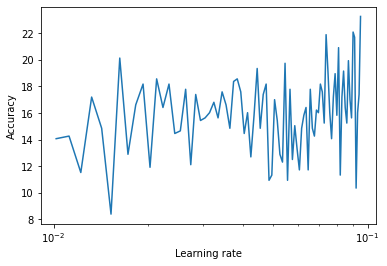

94    0.094955
Name: lr, dtype: float64

In [10]:
lr_max = LR_Max(net,trainloader,start = 1e-4,end = 0.1,iters = 100,mode = 'linear')
lr_max

In [11]:
lr_min =  LR_Min(trainloader,lr_max)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.528684616088867 Batch_id=97 Accuracy=12.56: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.7278307676315308 Batch_id=97 Accuracy=30.18: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.8229891061782837 Batch_id=97 Accuracy=37.01: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.6181858777999878 Batch_id=97 Accuracy=41.34: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.341517210006714 Batch_id=97 Accuracy=12.07: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.1688921451568604 Batch_id=97 Accuracy=19.39: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.9168028831481934 Batch_id=97 Accuracy=26.93: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.718873143196106 Batch_id=97 Accuracy=32.61: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.773463487625122 Batch_id=97 Accuracy=37.78: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.2358834743499756 Batch_id=97 Accuracy=15.13: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.7099494934082031 Batch_id=97 Accuracy=34.39: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.484281301498413 Batch_id=97 Accuracy=42.03: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2367006540298462 Batch_id=97 Accuracy=48.07: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.5652401447296143 Batch_id=97 Accuracy=15.04: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.0552830696105957 Batch_id=97 Accuracy=25.75: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.8992769718170166 Batch_id=97 Accuracy=35.23: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.5533068180084229 Batch_id=97 Accuracy=42.64: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.3766393661499023 Batch_id=97 Accuracy=47.55: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.2441768646240234 Batch_id=97 Accuracy=21.07: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.832519769668579 Batch_id=97 Accuracy=34.37: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.5440622568130493 Batch_id=97 Accuracy=41.58: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.6536616086959839 Batch_id=97 Accuracy=48.75: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.4309097528457642 Batch_id=97 Accuracy=53.18: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.0663490295410156 Batch_id=97 Accuracy=16.55: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.883089542388916 Batch_id=97 Accuracy=29.46: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.563274621963501 Batch_id=97 Accuracy=40.17: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.4394991397857666 Batch_id=97 Accuracy=46.07: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.1269434690475464 Batch_id=97 Accuracy=52.18: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]


In [12]:
print('LR Min is ',lr_min)


LR Min is  0.010550505050505051


In [13]:
net = Net().to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          pct_start = 5/24, # 5/24
                                          epochs =24,
                                          steps_per_epoch=len(trainloader),
                                          div_factor = lr_max.values[0]/lr_min,
                                          final_div_factor = 1)

# net = Net().to(device)
for epoch in range(24):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.842261552810669 Batch_id=97 Accuracy=13.99: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.4956, Accuracy: 1826/10000 (18.26%)

EPOCH: 1


Loss=2.1163113117218018 Batch_id=97 Accuracy=22.18: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.1507, Accuracy: 2707/10000 (27.07%)

EPOCH: 2


Loss=2.0289902687072754 Batch_id=97 Accuracy=28.23: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.0419, Accuracy: 3354/10000 (33.54%)

EPOCH: 3


Loss=1.8180809020996094 Batch_id=97 Accuracy=33.44: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6347, Accuracy: 3886/10000 (38.86%)

EPOCH: 4


Loss=1.643800973892212 Batch_id=97 Accuracy=37.97: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5710, Accuracy: 4565/10000 (45.65%)

EPOCH: 5


Loss=1.709017038345337 Batch_id=97 Accuracy=41.55: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5579, Accuracy: 4539/10000 (45.39%)

EPOCH: 6


Loss=1.4801756143569946 Batch_id=97 Accuracy=44.34: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4748, Accuracy: 5108/10000 (51.08%)

EPOCH: 7


Loss=1.3127715587615967 Batch_id=97 Accuracy=48.63: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4458, Accuracy: 5443/10000 (54.43%)

EPOCH: 8


Loss=1.244960069656372 Batch_id=97 Accuracy=51.30: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1917, Accuracy: 5933/10000 (59.33%)

EPOCH: 9


Loss=1.2157487869262695 Batch_id=97 Accuracy=55.37: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9995, Accuracy: 6469/10000 (64.69%)

EPOCH: 10


Loss=1.2437779903411865 Batch_id=97 Accuracy=58.71: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9867, Accuracy: 6550/10000 (65.50%)

EPOCH: 11


Loss=1.2714440822601318 Batch_id=97 Accuracy=59.46: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9554, Accuracy: 6799/10000 (67.99%)

EPOCH: 12


Loss=1.003294825553894 Batch_id=97 Accuracy=61.96: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8968, Accuracy: 6997/10000 (69.97%)

EPOCH: 13


Loss=0.9493952989578247 Batch_id=97 Accuracy=64.22: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7734, Accuracy: 7321/10000 (73.21%)

EPOCH: 14


Loss=0.9688454866409302 Batch_id=97 Accuracy=65.26: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8268, Accuracy: 7231/10000 (72.31%)

EPOCH: 15


Loss=0.9183339476585388 Batch_id=97 Accuracy=67.56: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6921, Accuracy: 7637/10000 (76.37%)

EPOCH: 16


Loss=0.8619741797447205 Batch_id=97 Accuracy=68.04: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6897, Accuracy: 7558/10000 (75.58%)

EPOCH: 17


Loss=0.996354877948761 Batch_id=97 Accuracy=69.13: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7073, Accuracy: 7609/10000 (76.09%)

EPOCH: 18


Loss=0.7216539978981018 Batch_id=97 Accuracy=70.11: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6494, Accuracy: 7872/10000 (78.72%)

EPOCH: 19


Loss=0.8157370686531067 Batch_id=97 Accuracy=71.64: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6547, Accuracy: 7770/10000 (77.70%)

EPOCH: 20


Loss=0.7286350131034851 Batch_id=97 Accuracy=71.94: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5826, Accuracy: 8045/10000 (80.45%)

EPOCH: 21


Loss=0.8578386902809143 Batch_id=97 Accuracy=73.11: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6225, Accuracy: 7863/10000 (78.63%)

EPOCH: 22


Loss=0.7235411405563354 Batch_id=97 Accuracy=73.95: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5457, Accuracy: 8119/10000 (81.19%)

EPOCH: 23


Loss=0.8494547009468079 Batch_id=97 Accuracy=74.11: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]



Test set: Average loss: 0.5911, Accuracy: 7932/10000 (79.32%)

Finished Training
